<a href="https://colab.research.google.com/github/DaveLoay/AP_TAREA_1/blob/main/AP_T1_EX4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


# Descargando DataSet

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Creando los DataLoaders para entrenamiento y validación

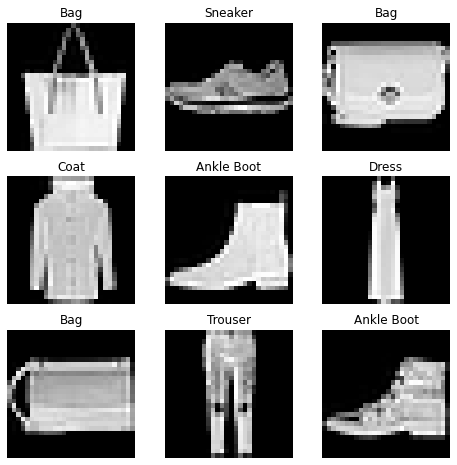

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Creando el modelos

Revisando el dispositivo donde corre

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# Modelo 1

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128,10),
            nn.ReLU(),
            nn.Linear(10, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
  )
)


# Modelo 2

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model_2 = NeuralNetwork().to(device)
print(model_2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)


# Model 3

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Sigmoid(),
            nn.Linear(512,100),
            nn.Sigmoid(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model_3 = NeuralNetwork().to(device)
print(model_3)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=512, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)


#Modelo 4

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # nn.Linear(28*28, 512),
            # nn.Sigmoid(),
            nn.Linear(28*28,100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model_4 = NeuralNetwork().to(device)
print(model_4)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


# Modelo 5

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model_5 = NeuralNetwork().to(device)
print(model_5)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


# Definiendo los optimizadores

OPT. Modelo 1

In [ ]:
learning_rate = 0.3

loss_fn = nn.CrossEntropyLoss() #Función de pérdida
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)  # Descenso por gradiente estocástico

OPT. Modelo 2

In [ ]:
learning_rate_2 = 0.35

loss_fn = nn.CrossEntropyLoss() #Función de pérdida
optimizer_2 = torch.optim.SGD(model_2.parameters(), lr = learning_rate_2)  # Descenso por gradiente estocástico

OPT. Modelo 3

In [ ]:
learning_rate_3 = 0.4

loss_fn = nn.CrossEntropyLoss() #Función de pérdida
optimizer_3 = torch.optim.SGD(model_3.parameters(), lr = learning_rate_3)  # Descenso por gradiente estocástico

OPT. Modelo 4

In [ ]:
learning_rate_4 = 0.7

loss_fn = nn.CrossEntropyLoss() #Función de pérdida
optimizer_4 = torch.optim.SGD(model_4.parameters(), lr = learning_rate_4)  # Descenso por gradiente estocástico

OPT. Modelo 5

In [ ]:
learning_rate_5 = 0.05

loss_fn = nn.CrossEntropyLoss() #Función de pérdida
optimizer_5 = torch.optim.SGD(model_5.parameters(), lr = learning_rate_5)  # Descenso por gradiente estocástico

# Función de entrenamiento

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Función de prueba

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#Entrenando el modelo 1

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.288450  [    0/60000]
loss: 0.849027  [ 6400/60000]
loss: 0.730604  [12800/60000]
loss: 0.694480  [19200/60000]
loss: 0.559157  [25600/60000]
loss: 0.465219  [32000/60000]
loss: 0.525419  [38400/60000]
loss: 0.588760  [44800/60000]
loss: 0.546462  [51200/60000]
loss: 0.471019  [57600/60000]
Test Error: 
 Accuracy: 78.7%, Avg loss: 0.551568 

Epoch 2
-------------------------------
loss: 0.448226  [    0/60000]
loss: 0.357648  [ 6400/60000]
loss: 0.425244  [12800/60000]
loss: 0.424238  [19200/60000]
loss: 0.394353  [25600/60000]
loss: 0.427025  [32000/60000]
loss: 0.399301  [38400/60000]
loss: 0.454013  [44800/60000]
loss: 0.481075  [51200/60000]
loss: 0.418080  [57600/60000]
Test Error: 
 Accuracy: 83.4%, Avg loss: 0.440113 

Epoch 3
-------------------------------
loss: 0.252572  [    0/60000]
loss: 0.330205  [ 6400/60000]
loss: 0.352103  [12800/60000]
loss: 0.379934  [19200/60000]
loss: 0.341064  [25600/60000]
loss: 0.423992  [32000/600

#Entrenando Modelo 2

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_2, loss_fn, optimizer_2)
    test(test_dataloader, model_2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.296657  [    0/60000]
loss: 0.714956  [ 6400/60000]
loss: 0.604107  [12800/60000]
loss: 0.619613  [19200/60000]
loss: 0.581173  [25600/60000]
loss: 0.472152  [32000/60000]
loss: 0.476727  [38400/60000]
loss: 0.520017  [44800/60000]
loss: 0.568735  [51200/60000]
loss: 0.472483  [57600/60000]
Test Error: 
 Accuracy: 82.9%, Avg loss: 0.447104 

Epoch 2
-------------------------------
loss: 0.297006  [    0/60000]
loss: 0.342871  [ 6400/60000]
loss: 0.382673  [12800/60000]
loss: 0.393029  [19200/60000]
loss: 0.364370  [25600/60000]
loss: 0.409401  [32000/60000]
loss: 0.355355  [38400/60000]
loss: 0.463556  [44800/60000]
loss: 0.459338  [51200/60000]
loss: 0.442376  [57600/60000]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.418328 

Epoch 3
-------------------------------
loss: 0.247578  [    0/60000]
loss: 0.327247  [ 6400/60000]
loss: 0.272811  [12800/60000]
loss: 0.355467  [19200/60000]
loss: 0.322601  [25600/60000]
loss: 0.394352  [32000/600

# Entrenando Modelo 3

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_3, loss_fn, optimizer_3)
    test(test_dataloader, model_3, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.319258  [    0/60000]
loss: 1.846455  [ 6400/60000]
loss: 1.075583  [12800/60000]
loss: 0.983505  [19200/60000]
loss: 0.775867  [25600/60000]
loss: 0.747245  [32000/60000]
loss: 0.725046  [38400/60000]
loss: 0.760988  [44800/60000]
loss: 0.704592  [51200/60000]
loss: 0.591696  [57600/60000]
Test Error: 
 Accuracy: 74.9%, Avg loss: 0.665164 

Epoch 2
-------------------------------
loss: 0.601825  [    0/60000]
loss: 0.623032  [ 6400/60000]
loss: 0.421529  [12800/60000]
loss: 0.623129  [19200/60000]
loss: 0.567260  [25600/60000]
loss: 0.482952  [32000/60000]
loss: 0.541002  [38400/60000]
loss: 0.614496  [44800/60000]
loss: 0.607901  [51200/60000]
loss: 0.460965  [57600/60000]
Test Error: 
 Accuracy: 77.4%, Avg loss: 0.623585 

Epoch 3
-------------------------------
loss: 0.519270  [    0/60000]
loss: 0.527805  [ 6400/60000]
loss: 0.361807  [12800/60000]
loss: 0.529275  [19200/60000]
loss: 0.484874  [25600/60000]
loss: 0.448013  [32000/600

# Entrenando Modelo 4

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_4, loss_fn, optimizer_4)
    test(test_dataloader, model_4, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.308440  [    0/60000]
loss: 1.172914  [ 6400/60000]
loss: 1.121083  [12800/60000]
loss: 0.804810  [19200/60000]
loss: 0.820320  [25600/60000]
loss: 0.743808  [32000/60000]
loss: 0.783164  [38400/60000]
loss: 1.122074  [44800/60000]
loss: 0.759711  [51200/60000]
loss: 0.672499  [57600/60000]
Test Error: 
 Accuracy: 65.7%, Avg loss: 0.835863 

Epoch 2
-------------------------------
loss: 0.866208  [    0/60000]
loss: 0.557503  [ 6400/60000]
loss: 0.614796  [12800/60000]
loss: 0.589840  [19200/60000]
loss: 0.817883  [25600/60000]
loss: 0.534260  [32000/60000]
loss: 0.575050  [38400/60000]
loss: 0.631787  [44800/60000]
loss: 0.685603  [51200/60000]
loss: 0.479408  [57600/60000]
Test Error: 
 Accuracy: 71.2%, Avg loss: 0.720455 

Epoch 3
-------------------------------
loss: 0.651466  [    0/60000]
loss: 0.490681  [ 6400/60000]
loss: 0.481940  [12800/60000]
loss: 0.611920  [19200/60000]
loss: 0.687930  [25600/60000]
loss: 0.414566  [32000/600

# Entrenando Modelo 5

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_5, loss_fn, optimizer_5)
    test(test_dataloader, model_5, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.455329  [    0/60000]
loss: 0.584330  [ 6400/60000]
loss: 0.488546  [12800/60000]
loss: 0.572341  [19200/60000]
loss: 0.533978  [25600/60000]
loss: 0.479006  [32000/60000]
loss: 0.480466  [38400/60000]
loss: 0.578272  [44800/60000]
loss: 0.581559  [51200/60000]
loss: 0.479791  [57600/60000]
Test Error: 
 Accuracy: 78.6%, Avg loss: 0.568722 

Epoch 2
-------------------------------
loss: 0.390194  [    0/60000]
loss: 0.474981  [ 6400/60000]
loss: 0.377194  [12800/60000]
loss: 0.458619  [19200/60000]
loss: 0.403883  [25600/60000]
loss: 0.448015  [32000/60000]
loss: 0.415742  [38400/60000]
loss: 0.523577  [44800/60000]
loss: 0.515809  [51200/60000]
loss: 0.445957  [57600/60000]
Test Error: 
 Accuracy: 81.2%, Avg loss: 0.499186 

Epoch 3
-------------------------------
loss: 0.308064  [    0/60000]
loss: 0.403948  [ 6400/60000]
loss: 0.320349  [12800/60000]
loss: 0.392460  [19200/60000]
loss: 0.346264  [25600/60000]
loss: 0.422467  [32000/600

#Discusión de Modelos

#Parámetros generales

Con el fin de poder hacer una comparación justa entre los diferentes modelos, se optó por entrenar por 5 épocas a todas las redes. De manera que los parámetros que se modificaron fueron:



*   Arquitectura de la red (Número de capas y de nueronas)
*   Tasa de aprendizaje 
*   Funciones de activación

Y los parámetros que se tomarón en cuenta para evaluar a la red fue la exactitud sobre el conjunto de prueba.

# Modelo 1
En una primera instancia se probó una configuración con 3 capas densas, completamente conectadas y con función de activación ReLU, empezando con una capa con 128 neuronas, seguida por otra capa de 10 neuronas y 10 neuronas en la capa de salida. Obteniendo una exactitud de \~85 % en la época 5.

Tasa de aprendizaje  = $0.3$

# Modelo 2
En la segunda red, se contemplo una arquitectura de 3 capas densas, sin embargo, se aumento el número de neuronas en cada una de ellas. Obteniendo un modelo con 512 neuronas en la primer capa, 100 en la segunda y 10 en la capa de salida. Obteniendo una exactitud de \~86 % en la época 5. Cabe aclarar que en cada capa se conservo la función de activación ReLU.

Tasa de aprendizaje  = $0.35$

# Modelo 3
En la tercera red, se conservo la misma arquitectura y número de neuronas que en el segundo modelo, sin embargo, la función de activación se modificó por una sigmoide. Obteniendo una exactitud de \~82 % en la época 5.

Tasa de aprendizaje  = $0.4$

# Modelo 4

En la cuarta red, se probó disminuyendo el número de capas, de manera que se tienen 2 capas densas, la primera con 100 neuronas y la capa de salida con 10 neuronas y con una función de activación ReLU. Obteniendo una exactitud de \~80 % en la época 5.

Tasa de aprendizaje = $0.7$

# Modelo 5

En la quinta red, a diferencia del modelo cuatro, se aumento una capa densa extra, de modo que se cuanta con 4 capas densas, la primera con 512 neuronas, la segunda 256 neuronas, la tercera con 128 nueronas y 10 neuronas en la capa de salida, con funciones de activación ReLU. Obteniendo una exactitud de \~84 % en la época 5. 

Tasa de aprendizaje = $0.05$

# Conclusión

Al varirar los diferentes parámetros en los modelos, se observó que una arquitectura con tres capas densas y función de activación ReLU (Modelo 2) muestra un mejor comportamiento en términos de exactitud en un conjunto de prueba. Por otro lado, la red en que se utilizó una función de activación sigmoide mostró un rendimiento menor en comparación con esa misma arquitectura con función de activación ReLU.

Y el número de capas, en este caso, funcionó mejor con tres capas densas, haciendo notar que el número de capas dependerá de la naturaleza del problema y el tipo de conjunto de datos con los que se cuente.

NOTA: Las tasas de aprendizaje furon encontradas de forma empírica, variando dicho parámetro hasta que se pudo obtener el valor más grande y que no disparará la pérdida. 